In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x = np.linspace(-2, 2, 11)   # 11 points from -2 to 2
y = np.linspace(-2, 2, 11)
X, Y = np.meshgrid(x, y)

# Stack into shape (2, N) where N = number of grid points
grid_points = np.vstack([X.flatten(), Y.flatten()])  # shape (2, 121)


In [3]:
theta = np.radians(30)   # rotation angle
scale = 1.2              # uniform scaling factor

A = scale * np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])
print("A =\n", A)


A =
 [[ 1.03923048 -0.6       ]
 [ 0.6         1.03923048]]


In [4]:
transformed_points = A @ grid_points   # shape (2, N)


In [5]:
eigenvalues, eigenvectors = np.linalg.eig(A)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors (columns):\n", eigenvectors)


Eigenvalues: [1.03923048+0.6j 1.03923048-0.6j]
Eigenvectors (columns):
 [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


TypeError: ufunc 'hypot' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

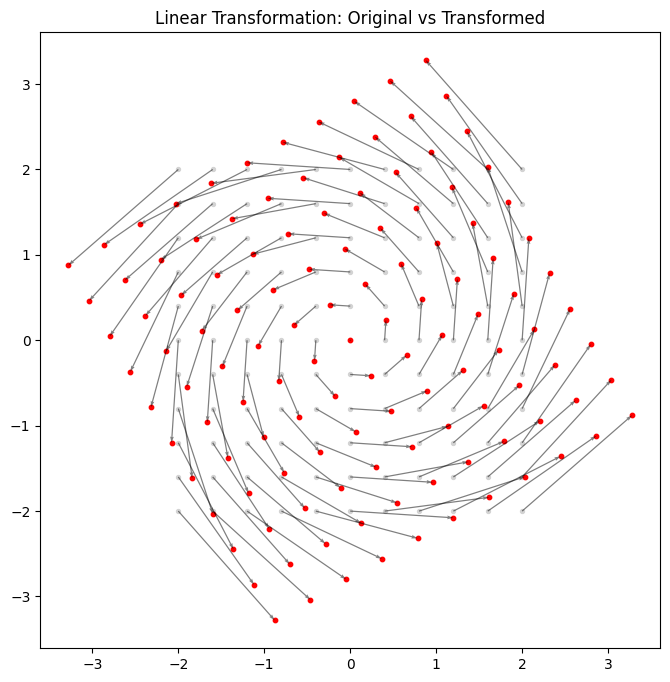

In [6]:
plt.figure(figsize=(8,8))
plt.title("Linear Transformation: Original vs Transformed")

# Plot original grid points (light)
plt.scatter(grid_points[0], grid_points[1], s=8, color='lightgray', label='Original points')

# Plot transformed grid points (solid)
plt.scatter(transformed_points[0], transformed_points[1], s=10, color='red', label='Transformed points')

# Draw arrows from original to transformed (optional, shows displacement)
plt.quiver(grid_points[0], grid_points[1],
           transformed_points[0] - grid_points[0],
           transformed_points[1] - grid_points[1],
           angles='xy', scale_units='xy', scale=1, alpha=0.5, width=0.002)

# Plot eigenvectors from origin, scaled so they're visible
origin = np.zeros((2,))  # [0, 0]
for i in range(eigenvectors.shape[1]):
    v = eigenvectors[:, i]
    # scale for plotting (use magnitude * eigenvalue for clarity)
    plt.arrow(0, 0, v[0]*1.6, v[1]*1.6, head_width=0.08, length_includes_head=True,
              linewidth=2, label=f"eigvec {i+1}" if i==0 else None)

plt.axhline(0, color='black', linewidth=0.6)
plt.axvline(0, color='black', linewidth=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
